In [1]:
import numpy as np
from randomforest import RandomForest
from decisiontree import DecisionTree
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer # simple test case


In [6]:
def calculate_F1(y, yhat):
    """Calculate F1 score."""
    tp = sum((y==1)&(yhat==1))
    fp = sum((y==0)&(yhat==1))
    fn = sum((y==1)&(yhat==0))
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    return 2*recall*precision/(recall + precision)

In [7]:
# randomly generated sample test
np.random.seed(2)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 2, 100)
tree = DecisionTree(9, eval_func="gini_impurity")
tree.fit(X_train, y_train)
print(tree) # visualize tree
print('Decision Tree Train Accuracy:', sum(tree.predict(X_train) == y_train) / 100)

forest = RandomForest(2)
forest.fit(X_train, y_train)
print('Random Forest Train Accuracy:', sum(forest.predict(X_train) == y_train) / 100)

[2,0.94]
[3,0.97](0.0)
[3,0.54](0.0)
[3,0.17][0,0.83]
[4,0.69][0,0.64][0,0.78](1.0)
[4,0.42](1.0)[1,0.69][1,0.82][0,0.71](0.0)
[3,0.09](0.0)[3,0.37](0.0)(0.0)(1.0)[4,0.84](1.0)
[0,0.85](1.0)[0,0.30][1,0.37][4,0.76](1.0)
[3,0.00](1.0)[0,0.21](0.0)[1,0.15][0,0.09][0,0.59](0.0)
(1.0)(0.0)(0.2)(1.0)(0.5)(1.0)(1.0)(0.0)(0.6875)(0.25)
Decision Tree Train Accuracy: 0.91
Random Forest Train Accuracy: 0.94


In [4]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data['target_names'], data['feature_names']

(array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [45]:
# load breast cancer dataset
data = load_breast_cancer()
X = data['data']
y = data['target']

In [46]:
n,d = X.shape
np.random.seed(1)
shuffled = np.arange(n)
np.random.shuffle(shuffled)
train_n = int(n*0.8)
test_n = n-train_n
train_idx = shuffled[:train_n]
test_idx = shuffled[train_n:]

X_train = X[train_idx,]
y_train = y[train_idx]
X_test = X[test_idx,]
y_test = y[test_idx]

In [47]:
tree_train = []
tree_test = []
forest_train = []
forest_test = []
depths = np.arange(2,15)
for depth in depths:
    tree = DecisionTree(depth)
    tree.fit(X_train, y_train)
    tree_train.append(sum(tree.predict(X_train) == y_train) / train_n)
    tree_test.append(sum(tree.predict(X_test) == y_test) / test_n)
    
    forest = RandomForest(10, depth=depth)
    forest.fit(X_train, y_train)
    forest_train.append(sum(forest.predict(X_train) == y_train) / train_n)
    forest_test.append(sum(forest.predict(X_test) == y_test) / test_n)

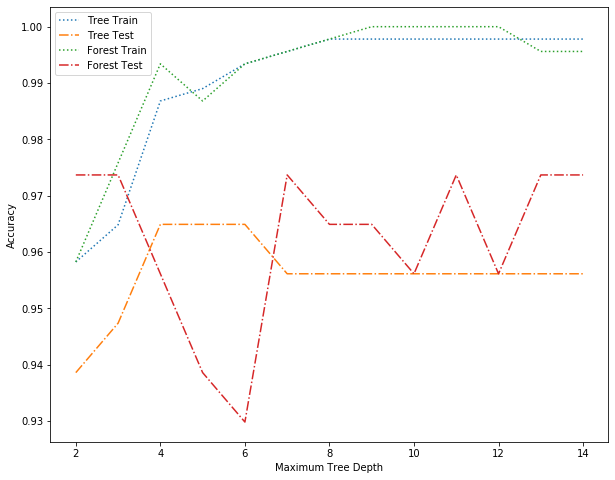

In [48]:
plt.figure(figsize = (10,8))
plt.plot(depths,tree_train, ls = ':', label = 'Tree Train')
plt.plot(depths,tree_test, ls = '-.', label = 'Tree Test')
plt.plot(depths,forest_train, ls = ':', label = 'Forest Train')
plt.plot(depths,forest_test, ls = '-.', label = 'Forest Test')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(525, 2)

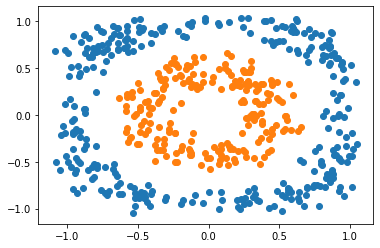

In [138]:
np.random.seed(99)
X = np.random.uniform(size=(1000,2))*2-1
x,y = X[:,0],X[:,1]
indi = (x**2+y**2 > 0.3**2) & (x**2+y**2 < 0.6**2) | (x**2+y**2 > 0.9**2) & (x**2+y**2 < 1.2**2)
X = X[indi,:]
x,y = X[:,0],X[:,1]
indi = x**2+y**2 > 0.7**2
y = indi*1
X += (np.random.uniform(size=(X.shape))*0.2-0.1)
plt.scatter(X[indi,0],X[indi,1])
plt.scatter(X[~indi,0],X[~indi,1])
X.shape

In [139]:
n,d = X.shape
shuffled = np.arange(n)
np.random.shuffle(shuffled)
train_n = int(n*0.8)
test_n = n-train_n
train_idx = shuffled[:train_n]
test_idx = shuffled[train_n:]

X_train = X[train_idx,]
y_train = y[train_idx]
X_test = X[test_idx,]
y_test = y[test_idx]

In [42]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)
tree_train = []
tree_test = []
forest_train = []
forest_test = []
sk_train = []
sk_test = []
depths = np.arange(2,20)
for depth in depths:
    tree = DecisionTree(depth)
    tree.fit(X_train, y_train)
    tree_train.append(calculate_F1(y_train, tree.predict(X_train)))
    tree_test.append(calculate_F1(y_test, tree.predict(X_test)))
    
    forest = RandomForest(feature_count=2, tree_num = 10, depth = depth)
    forest.fit(X_train, y_train)
    forest_train.append(calculate_F1(y_train, forest.predict(X_train)))
    forest_test.append(calculate_F1(y_test, forest.predict(X_test)))
    
    clf = RandomForestClassifier(n_estimators=10, max_depth=depth)
    clf.fit(X_train, y_train)
    sk_train.append(calculate_F1(y_train, clf.predict(X_train)))
    sk_test.append(calculate_F1(y_test, clf.predict(X_test)))


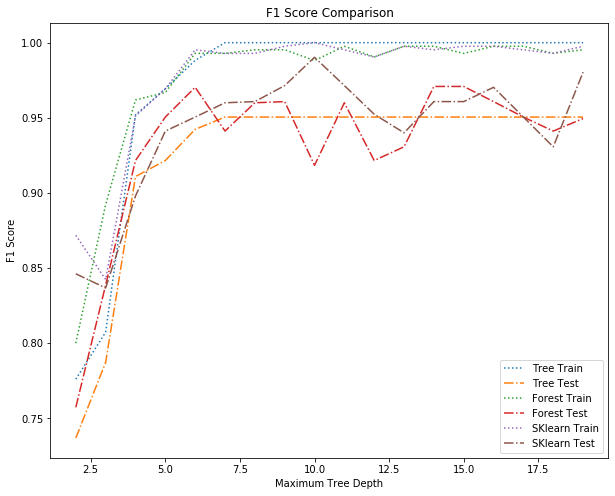

In [43]:
plt.figure(figsize = (10,8))
plt.plot(depths,tree_train, ls = ':', label = 'Tree Train')
plt.plot(depths,tree_test, ls = '-.', label = 'Tree Test')
plt.plot(depths,forest_train, ls = ':', label = 'Forest Train')
plt.plot(depths,forest_test, ls = '-.', label = 'Forest Test')
plt.plot(depths,sk_train, ls = ':', label = 'SKlearn Train')
plt.plot(depths,sk_test, ls = '-.', label = 'SKlearn Test')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.legend()
plt.show()

In [140]:
h = 0.01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

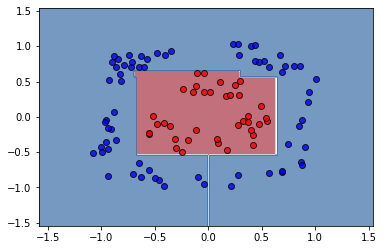

In [146]:
tree = DecisionTree(5)
tree.fit(X_train, y_train)
cm = plt.cm.RdBu
plt.contourf(xx,yy, tree.predict_prob(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape),cmap=cm, alpha = 0.6)
y_pred = tree.predict(X_test)
plt.scatter(X_test[y_pred==1,0],X_test[y_pred==1,1], c= 'b', alpha = .8,edgecolors='k')
plt.scatter(X_test[y_pred==0,0],X_test[y_pred==0,1], c= 'r', alpha = .8,edgecolors='k')